<a href="https://colab.research.google.com/github/Spo-od/DataAn/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


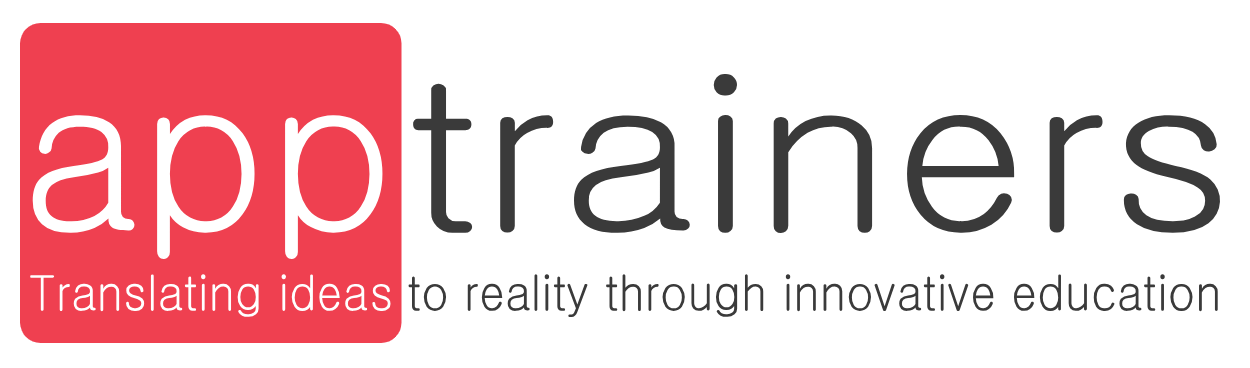

## **Traffic Data Cleaning Task**





1.Data Exploration:Load the dataset and display:

First 5 rows (head()).

Dataset information (info()).

Basic statistical summary (describe()).



In [3]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



traffic = pd.read_csv('/content/traffic.csv')

traffic.head(5)
traffic.describe()
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


2.Missing Values Handling:
Check for missing values in the dataset.

If any missing values are found:

For CarCount, BikeCount, BusCount, TruckCount: replace missing values with their respective column means.

For Traffic Situation: replace missing values with the most frequent category (mode).

For Day of the week: drop any rows containing missing values.

In [8]:
traffic.isnull().sum()

for col in ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']:
    if col in traffic.columns:
        mean_value = traffic[col].mean()
        traffic[col].fillna(mean_value, inplace=True)

if 'Traffic Situation' in traffic.columns:
    mode_value = traffic['Traffic Situation'].mode()[0]
    traffic['Traffic Situation'].fillna(mode_value, inplace=True)

if 'Day of the week' in traffic.columns:
    traffic.dropna(subset=['Day of the week'], inplace=True)

print("\nMissing values after handling:\n", traffic.isnull().sum())





Missing values after handling:
 Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


3.Duplicate Records:
Check for duplicate rows.

If duplicates are found, remove them.



In [10]:
duplicate_count = traffic.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    traffic.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


4.Outliers Detection and Treatment :
For columns: CarCount, BikeCount, BusCount, TruckCount, Total

Detect if any value is:

Less than 0 (which is impossible for counts).

Extremely high (using IQR method or quantile method).

If an outlier is found:

Replace it with the median of that column.



5.Vehicle Distribution Analysis:
Plot the distribution of CarCount, BikeCount, BusCount, and TruckCount:

Use Boxplots and Histograms for visualization.

Comment on which vehicle type shows the highest variability.



6.Traffic Situation Distribution:
Visualize the counts of each Traffic Situation category (low, normal, high):

Use either a Bar Chart or Pie Chart.

7.Save Cleaned Data:
Save the cleaned dataset to a new CSV file named:
traffic_cleaned.csv